# Water, wet vegetation and fractional cover polygon drill stack plot

| Authors:  | Bex Dunn|
|----------|----------------|
| Created: | Jan 7, 2019 |
| Last edited: | Jan 10, 2019 |

**Requirements:**

You need to run the following commands from the command line prior to launching jupyter notebooks from the same terminal so that the required libraries and paths are set:

`module use /g/data/v10/public/modules/modulefiles` 

`module load dea`

If you find an error or bug in this notebook, please either create an 'Issue' in the Github repository, or fix it yourself and create a 'Pull' request to contribute the updated notebook back into the repository (See the repository [README](https://github.com/GeoscienceAustralia/dea-notebooks/blob/master/README.rst) for instructions on creating a Pull request).

__Background:__ Data from the [Landsat](https://landsat.usgs.gov/about-landsat) 5,7 and 8 satellite missions are accessible through [Digital Earth Australia](http://www.ga.gov.au/about/projects/geographic/digital-earth-australia) (DEA). The code snippets in this notebook will let you retrieve and plot the [Fractional Cover](https://d28rz98at9flks.cloudfront.net/79676/Fractional_Cover_FC25_v1_5.PDF) (FC25) data stored in DEA.

__What does this notebook do?:__ This notebook takes a supplied shapefile of a polygon and queries the datacube for WOfS, Fractional Cover and NBART. It calculates thresholded tasselled cap wetness. The results are plotted against each other as a stacked plot for assessing change in wetlands or land cover. 
    
__How to use this notebook:__

A basic understanding of any programming language is desirable but one doesn't have to be an expert Python programmer to manipulate the code to get and display the data.This doc applies to the following Landsat satellites, Fractional Cover bands and the WOfS dataset:

- Landsat 5
- Landsat 7
- Landsat 8
- PV - Photosythetic vegetation
- NPV - Non-Photosythetic vegetation
- BS - Bare Soil
- WOfS Feature Layers (WOFLs)




__Future Work:__ 
- do this by max extent of wetness
- add rainfall for context
        

### import modules


In [1]:
import datacube
import datetime
import fiona
import geopandas as gpd
import numpy as np
import os
import pandas as pd
import rasterio.mask
import rasterio.features
from shapely import geometry
import seaborn as sns
import sys
import xarray as xr

import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from datacube.storage import masking
from datacube.utils import geometry

sys.path.append('../10_Scripts')
import DEADataHandling, DEAPlotting, TasseledCapTools, RainfallTools

dc = datacube.Datacube(app='tci and wofs')

### Set up polygons

In [2]:
#path to polygon locations
polys_path = '/g/data/r78/rjd547/SA_mound_springs/'

### Run for all polygons in directory

Twelve_Mile_new.shp
Loading ls5 pixel quality
    Loading 276 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 61 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 95 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea/20181015/lib/python3.6/site-packages/datacube/api/query.py:93: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  if like:


Loading ls5 pixel quality
    Loading 276 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 61 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 95 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
These rainfall grids have been realigned by the load_rainfall function - if you think this  may be incorrect then check your data and metadata then contact BDunn or VNewey
<xarray.Dataset>
Dimensions:   (time: 32)
Coordinates:
  * time      (time) datetime64[ns] 1987-01-01 1988-01-01 ... 2018-01-01
Data variables:
    rainfall  (time) float32 130.1 217.00003 250.09999 ... 172.69997 20.1


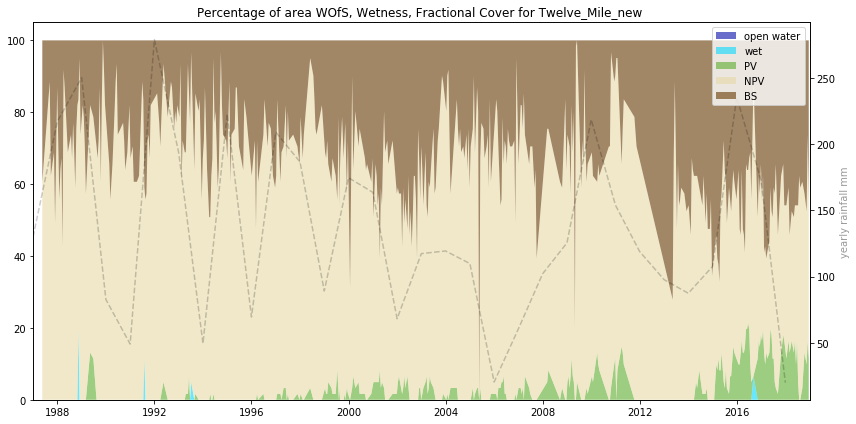

Nilpinna.shp
Loading ls5 pixel quality
    Loading 281 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 68 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 90 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea/20181015/lib/python3.6/site-packages/datacube/api/query.py:93: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  if like:


Loading ls5 pixel quality
    Loading 281 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 68 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 90 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
These rainfall grids have been realigned by the load_rainfall function - if you think this  may be incorrect then check your data and metadata then contact BDunn or VNewey
<xarray.Dataset>
Dimensions:   (time: 32)
Coordinates:
  * time      (time) datetime64[ns] 1987-01-01 1988-01-01 ... 2018-01-01
Data variables:
    rainfall  (time) float32 178.1 189.6 232.9 ... 267.10004 197.50003 48.1


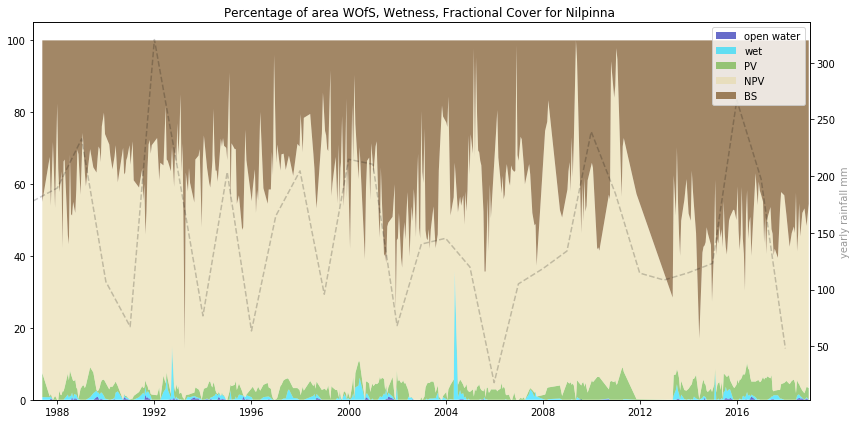

Freeling_Springs.shp
Loading ls5 pixel quality
    Loading 292 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 63 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 94 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea/20181015/lib/python3.6/site-packages/datacube/api/query.py:93: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  if like:


Loading ls5 pixel quality
    Loading 292 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 63 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 94 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
These rainfall grids have been realigned by the load_rainfall function - if you think this  may be incorrect then check your data and metadata then contact BDunn or VNewey
<xarray.Dataset>
Dimensions:   (time: 32)
Coordinates:
  * time      (time) datetime64[ns] 1987-01-01 1988-01-01 ... 2018-01-01
Data variables:
    rainfall  (time) float32 190.1 193.5 188.29996 ... 262.09998 185.4 25.600004


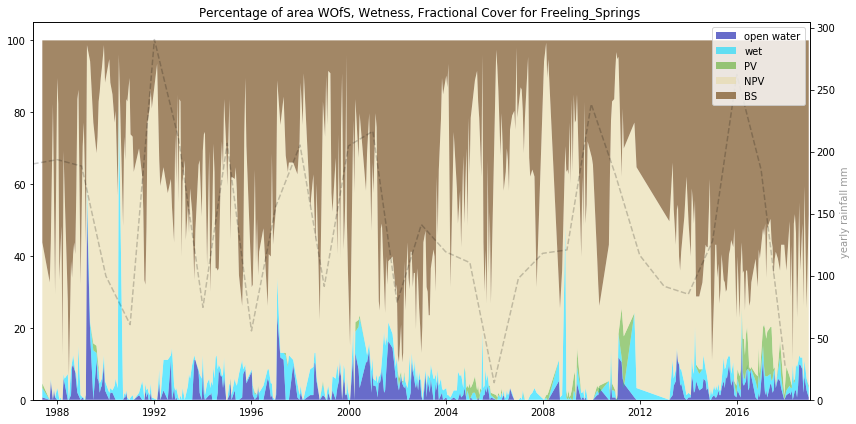

Twelve_Mile.shp
Loading ls5 pixel quality
    Loading 273 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 60 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 95 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea/20181015/lib/python3.6/site-packages/datacube/api/query.py:93: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  if like:


Loading ls5 pixel quality
    Loading 273 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 60 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 95 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
These rainfall grids have been realigned by the load_rainfall function - if you think this  may be incorrect then check your data and metadata then contact BDunn or VNewey
<xarray.Dataset>
Dimensions:   (time: 32)
Coordinates:
  * time      (time) datetime64[ns] 1987-01-01 1988-01-01 ... 2018-01-01
Data variables:
    rainfall  (time) float32 130.09999 217.00003 250.09998 ... 172.69997 20.1


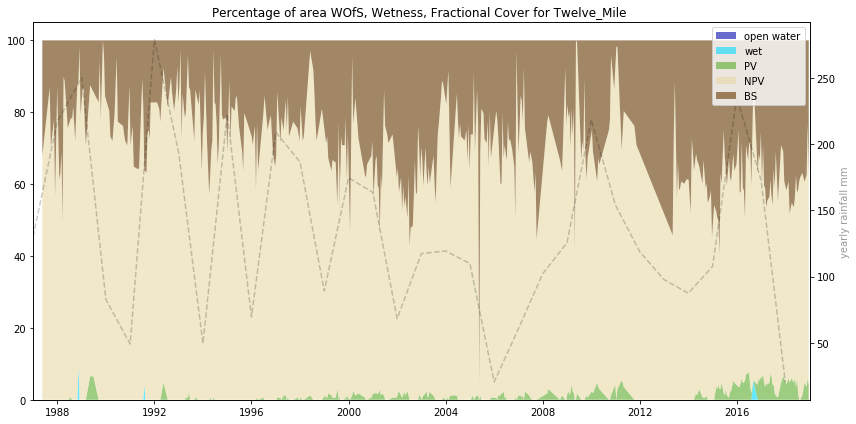

Birribirriana.shp
Loading ls5 pixel quality
    Loading 254 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 67 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 88 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea/20181015/lib/python3.6/site-packages/datacube/api/query.py:93: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  if like:


Loading ls5 pixel quality
    Loading 254 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 67 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 88 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
These rainfall grids have been realigned by the load_rainfall function - if you think this  may be incorrect then check your data and metadata then contact BDunn or VNewey
<xarray.Dataset>
Dimensions:   (time: 32)
Coordinates:
  * time      (time) datetime64[ns] 1987-01-01 1988-01-01 ... 2018-01-01
Data variables:
    rainfall  (time) float32 178.1 189.6 232.9 ... 267.10004 197.50005 48.1


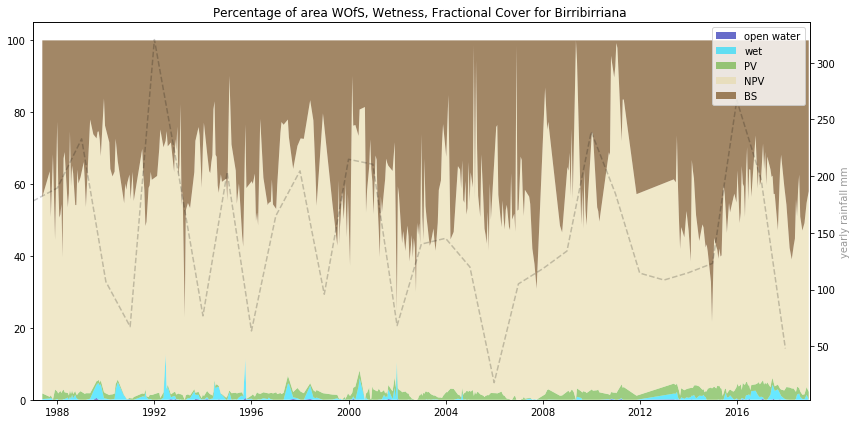

JohnsonNo3.shp
Loading ls5 pixel quality
    Loading 203 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 61 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 96 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea/20181015/lib/python3.6/site-packages/datacube/api/query.py:93: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  if like:


Loading ls5 pixel quality
    Loading 203 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 61 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 96 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
These rainfall grids have been realigned by the load_rainfall function - if you think this  may be incorrect then check your data and metadata then contact BDunn or VNewey
<xarray.Dataset>
Dimensions:   (time: 32)
Coordinates:
  * time      (time) datetime64[ns] 1987-01-01 1988-01-01 ... 2018-01-01
Data variables:
    rainfall  (time) float32 119.69997 201.59998 ... 159.65005 13.700001


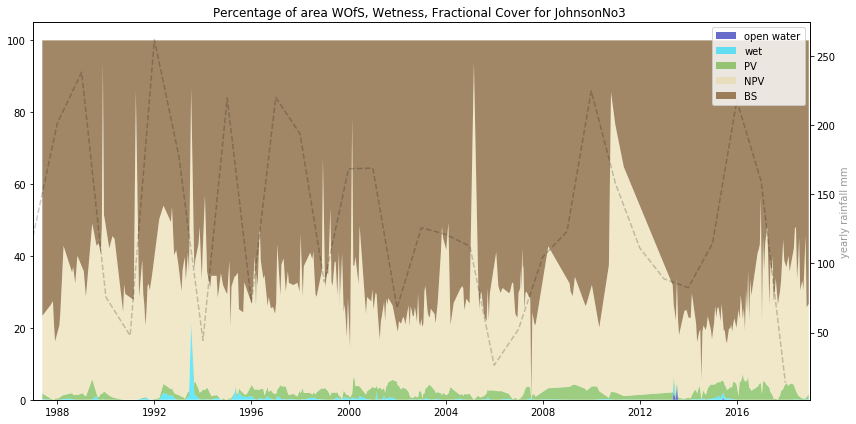

TheFountain.shp
Loading ls5 pixel quality
    Loading 277 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 64 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 92 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea/20181015/lib/python3.6/site-packages/datacube/api/query.py:93: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  if like:


Loading ls5 pixel quality
    Loading 277 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 64 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 92 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
These rainfall grids have been realigned by the load_rainfall function - if you think this  may be incorrect then check your data and metadata then contact BDunn or VNewey
<xarray.Dataset>
Dimensions:   (time: 32)
Coordinates:
  * time      (time) datetime64[ns] 1987-01-01 1988-01-01 ... 2018-01-01
Data variables:
    rainfall  (time) float32 124.099976 224.49997 265.90002 ... 175.40002 18.8


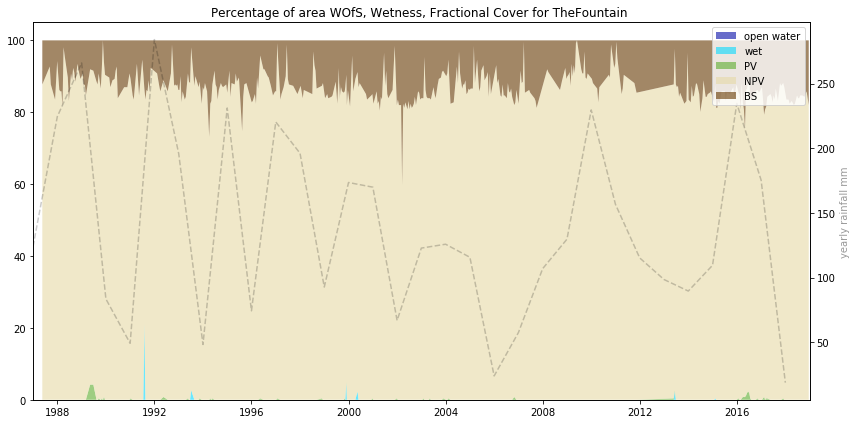

Big_Blythe_small.shp
Loading ls5 pixel quality
    Loading 278 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 65 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 96 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea/20181015/lib/python3.6/site-packages/datacube/api/query.py:93: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  if like:


Loading ls5 pixel quality
    Loading 278 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 65 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 96 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
These rainfall grids have been realigned by the load_rainfall function - if you think this  may be incorrect then check your data and metadata then contact BDunn or VNewey
<xarray.Dataset>
Dimensions:   (time: 32)
Coordinates:
  * time      (time) datetime64[ns] 1987-01-01 1988-01-01 ... 2018-01-01
Data variables:
    rainfall  (time) float32 187.69997 197.09999 ... 177.90001 21.199999


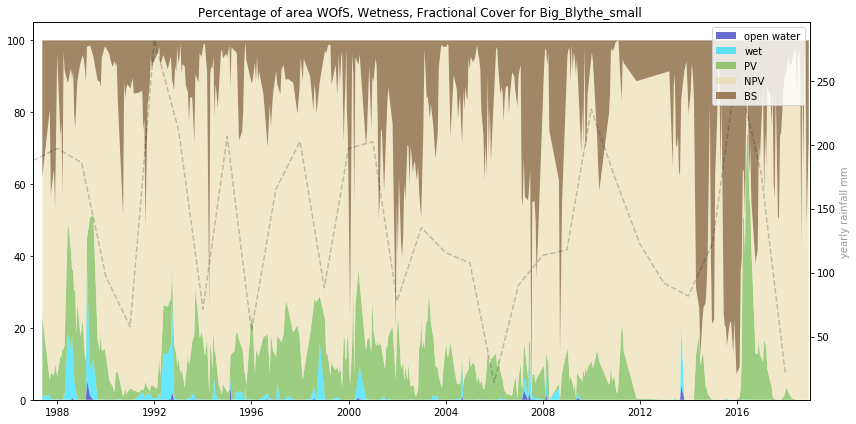

BigBlythe.shp
Loading ls5 pixel quality
    Loading 280 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 65 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 96 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea/20181015/lib/python3.6/site-packages/datacube/api/query.py:93: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  if like:


Loading ls5 pixel quality
    Loading 280 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 65 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 96 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
These rainfall grids have been realigned by the load_rainfall function - if you think this  may be incorrect then check your data and metadata then contact BDunn or VNewey
<xarray.Dataset>
Dimensions:   (time: 32)
Coordinates:
  * time      (time) datetime64[ns] 1987-01-01 1988-01-01 ... 2018-01-01
Data variables:
    rainfall  (time) float32 187.69997 197.09999 185.9 ... 177.90001 21.199999


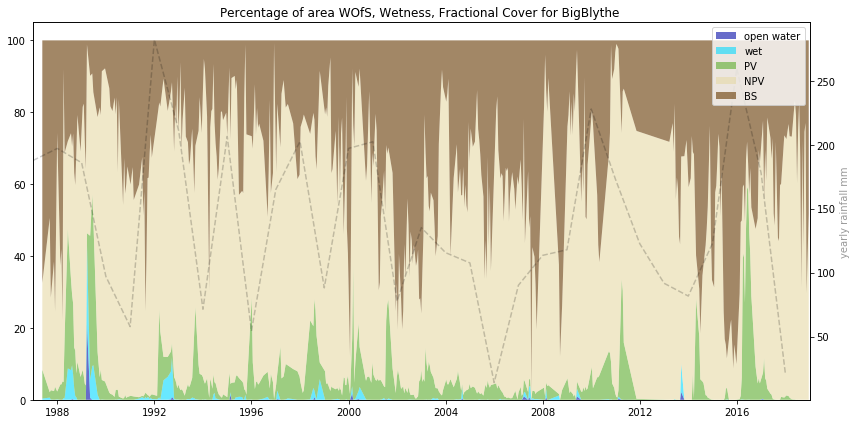

Outside_springs.shp
Loading ls5 pixel quality
    Loading 170 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 54 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 66 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


/g/data/v10/public/modules/dea/20181015/lib/python3.6/site-packages/datacube/api/query.py:93: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  if like:


Loading ls5 pixel quality
    Loading 170 filtered ls5 timesteps
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 54 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 66 filtered ls8 timesteps
Combining and sorting ls5, ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
These rainfall grids have been realigned by the load_rainfall function - if you think this  may be incorrect then check your data and metadata then contact BDunn or VNewey
<xarray.Dataset>
Dimensions:   (time: 32)
Coordinates:
  * time      (time) datetime64[ns] 1987-01-01 1988-01-01 ... 2018-01-01
Data variables:
    rainfall  (time) float32 142.79999 215.9 239.00003 ... 176.00003 21.6


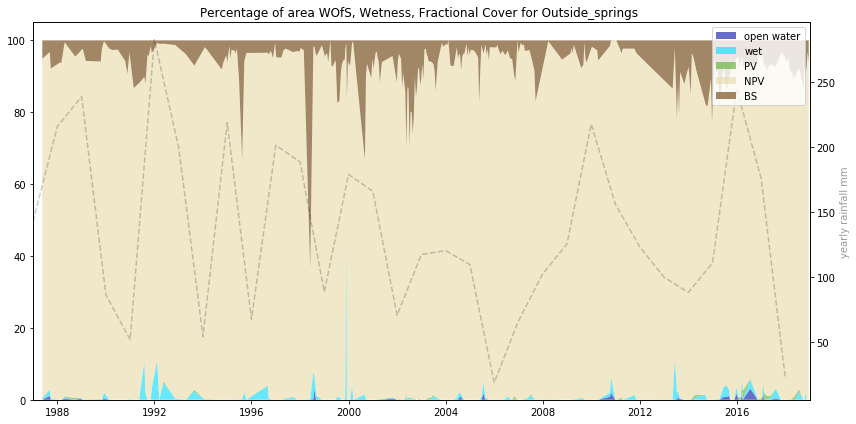

In [21]:
polys = os.listdir(polys_path)

#print out the shapefile names in the directory
for filename in polys:
    if 'shp' in filename:
        print(filename)
        #get the name of the polygon from the shapefile
        polyname = filename.split('.')[0]

        #open the polygon
        with fiona.open(polys_path+filename) as shapes:
                crs = geometry.CRS(shapes.crs_wkt)
                first_geometry = next(iter(shapes))['geometry']
                geom = geometry.Geometry(first_geometry, crs=crs)

#         #plot polygon to check it looks ok
#         plt.clf()
#         shape_plot = gpd.read_file(polys_path+filename)
#         shape_plot.plot()
#         plt.show()

        ### Set up query

        query = {'geopolygon': geom,
                 #'time': ('2016-01-01', '2018-06-30')
                 #'time': ('2007-01-01', '2007-06-30')
                 'time': ('1987-01-01', '2019-01-01')
                 }

        ## Set up datasets

        ### set cloudmasking threshold and load landsat nbart data

        #set cloudmasking threshold and load landsat nbart data
        landsat_masked_prop = 0.90
        ls578_ds = DEADataHandling.load_clearlandsat(dc=dc, query=query, product='nbart',
                masked_prop=landsat_masked_prop)

        ### mask the data with our original polygon to remove extra data 

        data = ls578_ds
        mask = rasterio.features.geometry_mask([geom.to_crs(data.geobox.crs)for geoms in [geom]],
                                                   out_shape=data.geobox.shape,
                                                   transform=data.geobox.affine,
                                                   all_touched=False,
                                                   invert=False)

        #for some reason xarray is not playing nicely with our old masking function
        mask_xr = xr.DataArray(mask, dims = ('y','x'))
        ls578_ds = data.where(mask_xr==False)

        #transform the nbart into tci
        tci = TasseledCapTools.thresholded_tasseled_cap(ls578_ds,wetness_threshold=-350, drop=True , drop_tc_bands=True)

        ### create a masked version of the extent of overthreshold wetness

        #select only finite values (over threshold values)
        tcw = xr.ufuncs.isfinite(tci.wetness_thresholded)

        # #reapply the polygon mask
        tcw = tcw.where(mask_xr==False)

        ### load wofls and select only wet pixels

        #load wofs
        wofls = dc.load(product = 'wofs_albers', like=ls578_ds)

        #only get wet obs
        wetwofl = masking.make_mask(wofls, wet=True)

        #match the wofs observations to the nbart
        wetwofl=wetwofl.where(wofls.time==ls578_ds.time)

        ### mask the wofs obs

        #mask the wofs obs with the polygon mask
        wetwofl = wetwofl.where(mask_xr==False)

        ### load in fractional cover data

        #load the data according to our query
        #choose a mask proportion to look for a clear timestep
        fc_ds = DEADataHandling.load_clearlandsat(dc, query,product='fc',masked_prop=0.90)

        ### mask FC with polygon

        fc_ds = fc_ds.where(mask_xr==False)

        ### mask FC with wetness

        fc_ds_noTCW=fc_ds.where(tcw==False)

        #set scene to plot
        scene =2

#         #set up our images on a grid using gridspec
#         plt.clf()
#         plt.figure(figsize=(12,8))
#         gs = gridspec.GridSpec(2,2) # set up a 2 x 2 grid of 4 images for better presentation

#         ax1=plt.subplot(gs[0,0])
#         fc_ds_noTCW.PV.isel(time=scene).plot(cmap='gist_earth_r')
#         ax1.set_title('PV')

#         ax2=plt.subplot(gs[1,0])
#         fc_ds_noTCW.BS.isel(time=scene).plot(cmap='Oranges')
#         ax2.set_title('BS')

#         ax3=plt.subplot(gs[0,1])
#         fc_ds_noTCW.NPV.isel(time=scene).plot(cmap='copper')
#         ax3.set_title('NPV')

#         ax4=plt.subplot(gs[1,1])
#         fc_ds_noTCW.UE.isel(time=scene).plot(cmap='magma')
#         ax4.set_title('UE')

#         plt.tight_layout()
#         plt.show()

        ### Calculate number of pixels in area of interest

        #number of pixels in area of interest
        pixels = (mask_xr==0).sum(dim=['x','y'])

        mask_xr==0
        mask_xr.count(dim=['x','y'])

        #count number of wofs pixels
        wofs_pixels = wetwofl.water.sum(dim=['x','y'])

        #count percentage of area of wofs
        wofs_area_percent = (wofs_pixels/pixels)*100

        #count number of tcw pixels
        tcw_pixel_count = tcw.sum(dim=['x','y'])

        #calculate percentage area wet
        tcw_area_percent = (tcw_pixel_count/pixels)*100

        #calculate wet not wofs
        tcw_less_wofs = tcw_area_percent-wofs_area_percent

        ### Calculate the dominant fraction for each pixel in Fractional Cover

        #drop data percentage and Unmixing Error
        fc_tester = fc_ds_noTCW.drop(['data_perc','UE'])

        #following robbi's advice, cast the dataset to a dataarray
        maxFC = fc_tester.to_array(dim='variable', name='maxFC')

        #turn FC array into integer only as nanargmax doesn't seem to handle floats the way we want it to
        FC_int = maxFC.astype('int8')

        #use numpy.nanargmax to get the index of the maximum value along the variable dimension
        #BSPVNPV=np.nanargmax(FC_int, axis=0)
        BSPVNPV=FC_int.argmax(dim='variable')

        FC_mask=xr.ufuncs.isfinite(maxFC).all(dim='variable')

        # #re-mask with nans to remove no-data
        BSPVNPV=BSPVNPV.where(FC_mask)

#         #plot the results to check they look roughly like what we are expecting
#         plt.clf()
#         plt.imshow(BSPVNPV[2])
#         plt.colorbar()

        FC_dominant = xr.Dataset({
            'BS': (BSPVNPV==0).where(FC_mask),
            'PV': (BSPVNPV==1).where(FC_mask),
            'NPV': (BSPVNPV==2).where(FC_mask),
        })

        FC_count = FC_dominant.sum(dim=['x','y'])
        
        #match the timestamps for our plot
        FC_count = FC_count.where(FC_count.time==wofs_area_percent.time)

        #Fractional cover pixel count method
        #Get number of FC pixels, divide by total number of pixels per polygon

        Bare_soil_percent=(FC_count.BS/pixels)*100

        Photosynthetic_veg_percent=(FC_count.PV/pixels)*100

        NonPhotosynthetic_veg_percent=(FC_count.NPV/pixels)*100

        #set up color palette
#         pal = [sns.xkcd_rgb["cobalt blue"],
#                sns.xkcd_rgb["neon blue"],
#                sns.xkcd_rgb["grass"],
#                sns.xkcd_rgb["beige"],
#                sns.xkcd_rgb["brown"]]#,
#               #sns.xkcd_rgb["grey"]]

#         #make a stacked area plot
#         plt.clf()
#         plt.figure(figsize = (12,6))
#         plt.stackplot(wofs_area_percent.time.values, 
#                       wofs_area_percent, 
#                       tcw_less_wofs, 
#                       Photosynthetic_veg_percent, 
#                       NonPhotosynthetic_veg_percent,
#                       Bare_soil_percent,
#                       labels=['open water',
#                               'wet',
#                               'PV',
#                               'NPV',
#                               'BS'#,
#                               #'NoData'
#                              ], colors=pal, alpha = 0.6)

#         plt.title('Percentage of area WOfS, Wetness, Fractional Cover')

#         #set axis limits to the min and max
#         plt.axis(xmin = query['time'][0], xmax = query['time'][1], ymin = 0, ymax = 100)

#         #set date ticks every year
#         years = mdates.YearLocator(2)
#         yearsFmt = mdates.DateFormatter('%Y')
#         ax = plt.gca()
#         ax.xaxis.set_major_locator(years)
#         ax.xaxis.set_major_formatter(yearsFmt)

#         #add a legend and a tight plot box
#         plt.legend(loc='upper right')
#         plt.tight_layout()

#         #save the figure
#         plt.savefig(f'/g/data/r78/rjd547/SA_mound_springs/{polyname}.png')#, transparent=True)
#         plt.show()

#         #set up color palette
#         pal2 = [sns.xkcd_rgb["cobalt blue"],
#                sns.xkcd_rgb["neon blue"],
#                sns.xkcd_rgb["grass"],#,
#                 #sns.xkcd_rgb["grass"],
#                sns.xkcd_rgb["beige"]]
#                #sns.xkcd_rgb["brown"]]#,
#               #sns.xkcd_rgb["grey"]]


#         #make a stacked area plot
#         plt.clf()
#         plt.figure(figsize = (12,6))
#         plt.stackplot(wofs_area_percent.time.values, 
#                       wofs_area_percent, 
#                       tcw_less_wofs, 
#                       Photosynthetic_veg_percent, 
#                       NonPhotosynthetic_veg_percent,
#                       #Bare_soil_percent,
#                       #NoData,
#                       labels=['open water',
#                               'wet',
#                               'PV',
#                               #'NPV',
#                               #'BS'#,
#                               #'NoData'
#                              ], colors=pal2, alpha = 0.6)

#         plt.title('Percentage of area WOfS, Wetness, Photosynthetic Vegetation')

#         #set axis limits to the min and max
#         plt.axis(xmin = query['time'][0], xmax = query['time'][1], ymin = 0, ymax = 40)

#         #set date ticks every year
#         years = mdates.YearLocator(2)
#         yearsFmt = mdates.DateFormatter('%Y')
#         ax = plt.gca()
#         #ax.set_facecolor('xkcd:grey brown')
#         ax.xaxis.set_major_locator(years)
#         ax.xaxis.set_major_formatter(yearsFmt)

#         #add a legend and a tight plot box
#         plt.legend(loc='upper right')
#         plt.tight_layout()

#         #save the figure
#         plt.savefig(f'/g/data/r78/rjd547/SA_mound_springs/{polyname}_waterveg.png')#, transparent=True)
#         plt.show()


### Load rainfall data


        rain = RainfallTools.load_rainfall(query)
        #mask the rain with the polygon mask
        rain = rain.where(mask_xr==False)

        ### Resample the rainfall data 

        rain_yrly=rain.resample(time='YS').sum()
        rain_yrly = rain_yrly.where(mask_xr==False)

        #get 1D rain
        rain_flat= rain_yrly.mean(dim=['latitude','longitude','x','y'])
        print (rain_flat)
        flat_rain=rain_flat.squeeze()

 #make a stacked area plot

        #set up color palette
        pal = [sns.xkcd_rgb["cobalt blue"],
               sns.xkcd_rgb["neon blue"],
               sns.xkcd_rgb["grass"],
               sns.xkcd_rgb["beige"],
               sns.xkcd_rgb["brown"]]#,
              #sns.xkcd_rgb["grey"]]

        fig1, ax1 = plt.subplots(figsize = (12,6))
        ax1= plt.stackplot(wofs_area_percent.time.values, 
                      wofs_area_percent, 
                      tcw_less_wofs, 
                      Photosynthetic_veg_percent, 
                      NonPhotosynthetic_veg_percent,
                      Bare_soil_percent,
                      labels=['open water',
                              'wet',
                              'PV',
                              'NPV',
                              'BS' 
                             ], colors=pal, alpha = 0.6)
        #plt.gca().set_ylabel('percentage of area')
        lines, labels = plt.gca().get_legend_handles_labels()

        #set date ticks every year
        years = mdates.YearLocator(2)
        yearsFmt = mdates.DateFormatter('%Y')
        ax = plt.gca()
        #ax.set_facecolor('xkcd:grey brown')
        ax.xaxis.set_major_locator(years)
        ax.xaxis.set_major_formatter(yearsFmt)

        #plt.twinx(ax=ax2)
        ax2=plt.twinx()
        ax2=flat_rain.rainfall.plot.line(ax=ax2, c='black',ls='--', alpha=0.2)

        plt.gca().set_ylabel('yearly rainfall mm', color='xkcd:black',alpha=0.4)

        plt.title(f'Percentage of area WOfS, Wetness, Fractional Cover for {polyname} ')
        # #add a legend and a tight plot box
        plt.axis(xmin = query['time'][0], xmax = query['time'][1])#, ymin = 0, ymax = 40)

        lines2, labels2 = ax.get_legend_handles_labels()
        plt.legend(lines,labels, loc='upper right')
        plt.tight_layout()

        # #save the figure
        plt.savefig(f'/g/data/r78/rjd547/SA_mound_springs/{polyname}_rain2.png')#, transparent=True)
        plt.show()

In [20]:
flat_rain

<xarray.Dataset>
Dimensions:    (longitude: 2, time: 32)
Coordinates:
  * time       (time) datetime64[ns] 1987-01-01 1988-01-01 ... 2018-01-01
    latitude   float64 -28.3
  * longitude  (longitude) float64 136.5 136.6
Data variables:
    rainfall   (time, longitude) float32 120.09997 119.299965 ... 14.1 13.300001